## Import Necessary Libraries

In [39]:
import pandas as pd #import pandas libarary
import matplotlib.pyplot as plt #import seaborn
from imblearn.over_sampling import SMOTE #import sampling
import numpy as np #import numpy libarary
from sklearn.model_selection import train_test_split #data split
from sklearn.preprocessing import LabelEncoder, StandardScaler #for encoding
from sklearn.svm import SVC #import SVC
from sklearn.ensemble import RandomForestClassifier # importing RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay # checking for results of testing
from sklearn.model_selection import KFold #cross validation

## Load Dataset

In [40]:
data = pd.read_csv('D:/dis_cmp/2023-027/Disease/dataset/TMD3.csv')
data.head()

,date,time,batch_no,T1/C,T2/c,T3/C,Vent%,growing_room,temperature,humidity,...,air_pressure,ph,air_quality_index,air_quality,ventilation,wind_speed,light_intensity_level,peat in casing,possibility for disease growth,disease growth possibility level
0,6/14/2018,8:30,117.0,21.4,29.7,16.2,40.0,B3,22.40,82.0,...,1094.0,6.9,243.3,good,low,26.2,high,yes,favorable,High
1,6/14/2018,11:40,118.0,34.6,29.2,19.3,36.0,A1,14.29,61.0,...,996.9,8.6,197.1,moderate,high,14.7,medium,no,nonfavorable,Low
2,6/14/2018,14:30,101.0,9.0,20.0,8.2,41.0,B3,13.47,86.0,...,1023.5,8.7,13.8,good,low,29.0,medium,no,nonfavorable,Moderate
3,6/14/2018,17:40,116.0,4.9,5.2,13.9,57.0,A1,12.84,60.0,...,994.7,8.1,162.6,poor,high,21.9,medium,no,nonfavorable,Low
4,6/15/2018,8:30,149.0,39.0,29.2,6.1,67.0,B3,27.84,83.0,...,904.9,6.8,430.3,moderate,low,27.7,high,yes,favorable,High


In [41]:
#drop null values
data.dropna(inplace=True)

Feature selection for numerical columns using ANOVA F-Score

In [42]:
import pandas as pd
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

# Calculate ANOVA F-scores for numerical features
numeric_columns = data.select_dtypes(include='number').columns.tolist()
X_numerical = data[numeric_columns]
y = data['disease growth possibility level']  # Replace 'target_column' with the actual name of your target column

f_scores, _ = f_classif(X_numerical, y)

# Create a DataFrame to store feature scores
feature_scores = pd.DataFrame({'Feature': numeric_columns, 'F-Score': f_scores})

# Sort the features by their F-scores in descending order
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)
print(feature_scores)


              Feature      F-Score
10                 ph  1764.311827
5         temperature  1393.649802
6            humidity  1321.245470
2                T2/c     3.461362
4               Vent%     3.305306
7     light_intensity     2.087901
0            batch_no     1.777255
8       soil_moisture     0.936431
11  air_quality_index     0.842608
1                T1/C     0.475610
3                T3/C     0.335441
9        air_pressure     0.232109
12         wind_speed     0.150980


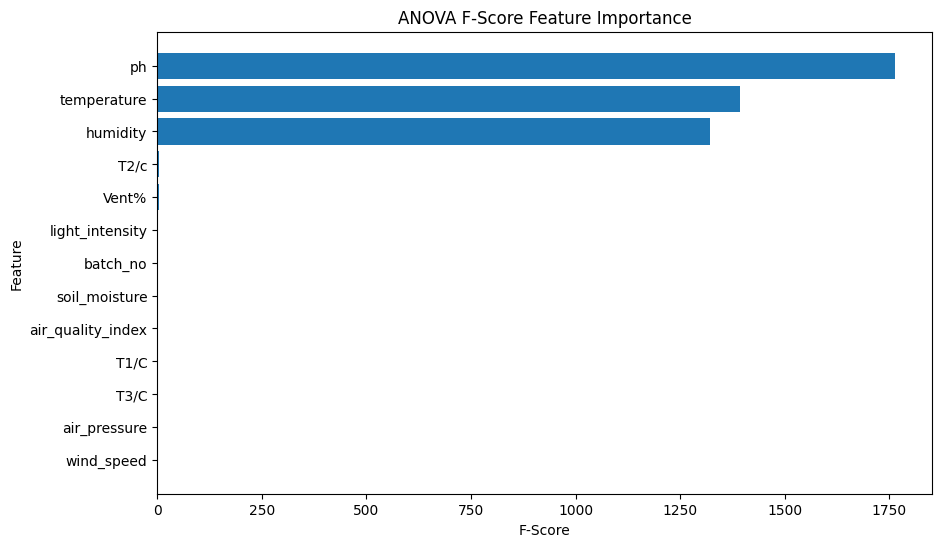

In [43]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['F-Score'])
plt.xlabel('F-Score')
plt.ylabel('Feature')
plt.title('ANOVA F-Score Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

Feature selection for strings using Chi-squared scores

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Define the columns you want to encode and the target column
columns_to_encode = ['air_quality', 'ventilation', 'light_intensity_level']
target_column = 'disease growth possibility level'

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Define your feature matrix (X) and target variable (y)
X = data[columns_to_encode]
y = data[target_column]

# Perform chi-squared test
chi2_scores, _ = chi2(X, y)

# Create a DataFrame to store feature scores
feature_scores = pd.DataFrame({'Feature': columns_to_encode, 'Chi-Squared Score': chi2_scores})

# Sort the features by their chi-squared scores in descending order
feature_scores = feature_scores.sort_values(by='Chi-Squared Score', ascending=False)
print(feature_scores)

                 Feature  Chi-Squared Score
1            ventilation        1579.610809
2  light_intensity_level         610.085646
0            air_quality           1.276782


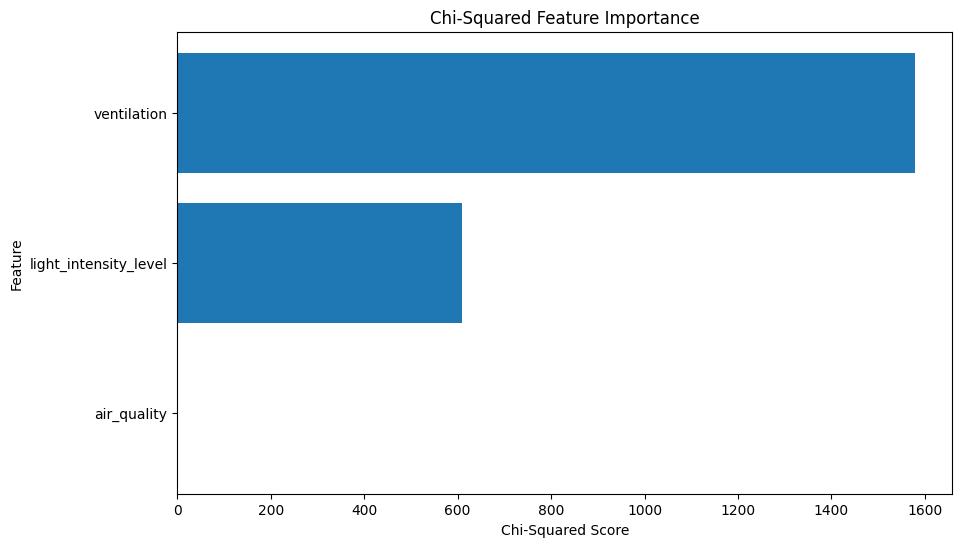

In [45]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Chi-Squared Score'])
plt.xlabel('Chi-Squared Score')
plt.ylabel('Feature')
plt.title('Chi-Squared Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

In [46]:
df_data =pd.read_csv('D:/dis_cmp/2023-027/Disease/dataset/env_data88.csv')
#display few records available in the dataset with the column names
df_data.head()

,date,time,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level
0,6/14/2018,8:30,22.40,82,low,high,6.9,High
1,6/14/2018,11:40,14.29,61,high,medium,8.6,Low
2,6/14/2018,14:30,13.47,86,low,medium,8.7,Moderate
3,6/14/2018,17:40,12.84,60,high,medium,8.1,Low
4,6/15/2018,8:30,27.84,83,low,high,6.8,High


In [47]:
# getting all the information regarding the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              7124 non-null   object 
 1   time                              7124 non-null   object 
 2   temperature                       7124 non-null   float64
 3   humidity                          7124 non-null   int64  
 4   ventilation                       7118 non-null   object 
 5   light_intensity                   7118 non-null   object 
 6   ph                                7118 non-null   float64
 7   disease growth possibility level  7124 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 445.4+ KB


## Checking for null and duplicate values

In [48]:
# here the code  is checking weather any nulls values are in the datset
df_data.isnull().sum()

date                                0
time                                0
temperature                         0
humidity                            0
ventilation                         6
light_intensity                     6
ph                                  6
disease growth possibility level    0
dtype: int64

In [49]:
#drop null values
df_data.dropna(inplace=True)

In [50]:
#checking weather any duplicate values are in the datset
df_data.duplicated().sum()

119

In [51]:
df_data.drop_duplicates(inplace=True)

## Drop unnecessary columns

In [52]:
df = df_data.drop(['date','time'], axis=1)# drop unnecessary columns

In [53]:
#print unique column values
print("Unique 'ventilation': {}".format(df['ventilation'].unique()))
print("Unique 'light_intensity': {}".format(df['light_intensity'].unique()))
print("Unique 'possibility for disease growth': {}".format(df['disease growth possibility level'].unique()))

Unique 'ventilation': ['low' 'high' 'medium']
Unique 'light_intensity': ['high' 'medium' 'low']
Unique 'possibility for disease growth': ['High' 'Low' 'Moderate']


## Convert categorical to numerical values

In [54]:
# Instantiate the LabelEncoder object
label_ventilation= LabelEncoder()
label_light_intensity = LabelEncoder()
label_prediction = LabelEncoder()

In [55]:
# Fit and transform the LabelEncoder object on the categorical data
category_labels1 = {'high': 0,'medium': 1, 'low':2}
df['ventilation'] = label_ventilation.fit_transform([category_labels1.get(cat) for cat in df['ventilation']])
df['light_intensity'] = label_light_intensity.fit_transform( [category_labels1.get(cat) for cat in df['light_intensity']])
category_labels2 = {'High': 0, 'Moderate': 1, 'Low' : 2}
df['disease growth possibility level']= label_prediction.fit_transform([category_labels2.get(cat) for cat in df['disease growth possibility level']])
df

,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level
0,22.40,82,2,0,6.9,0
1,14.29,61,0,1,8.6,2
2,13.47,86,2,1,8.7,1
3,12.84,60,0,1,8.1,2
4,27.84,83,2,0,6.8,0
...,...,...,...,...,...,...
7119,9.14,80,0,2,8.4,1
7120,32.85,57,2,0,5.3,1
7121,10.57,53,0,2,8.2,2
7122,28.94,78,1,0,6.4,0


# Inter-feature Correlation
heatmap can be used to check correlation between variables

<Axes: >

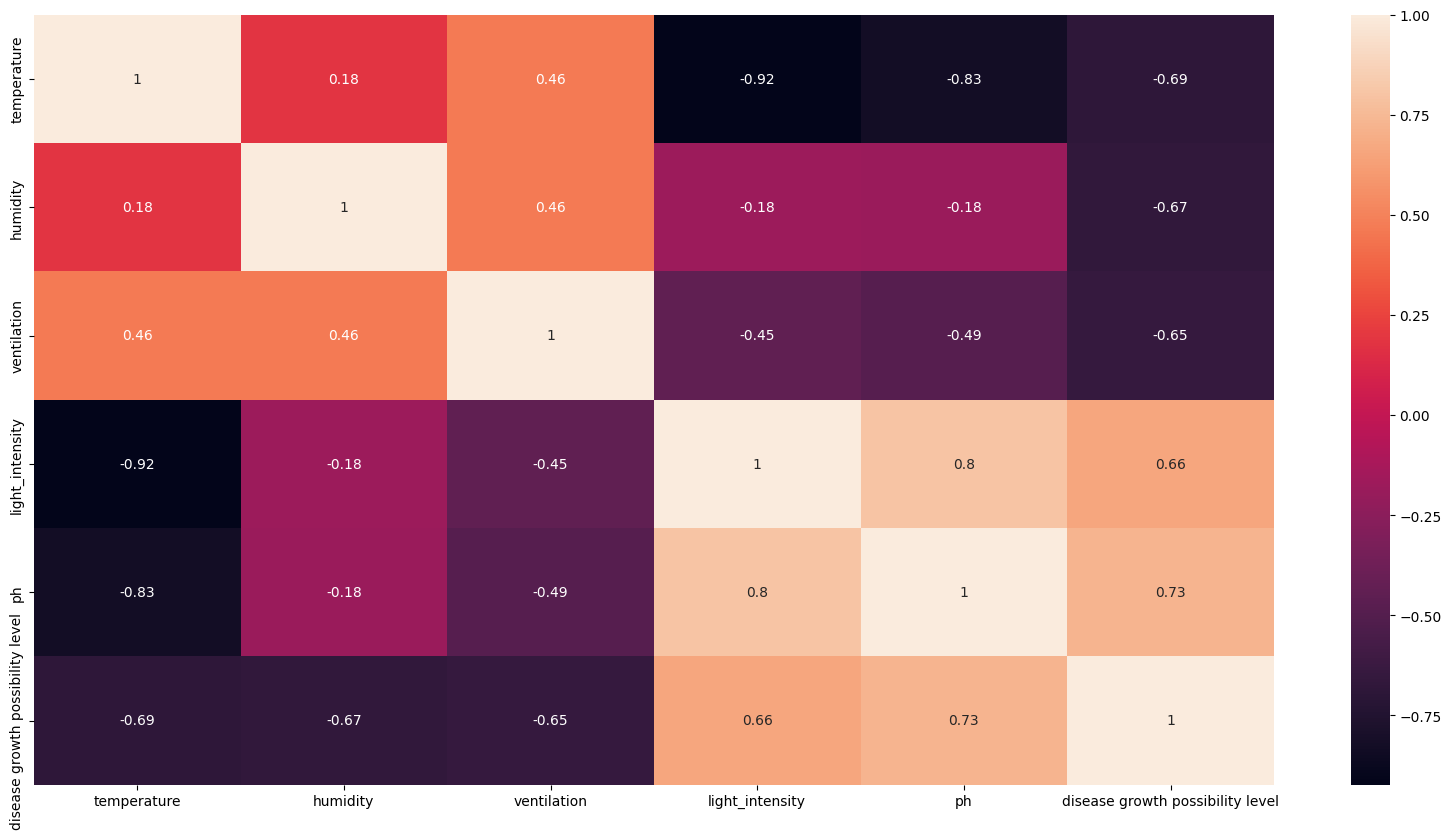

In [56]:
import seaborn as sns
hm=df
plt.figure(figsize = (20, 10))
sns.heatmap(hm.corr(), annot = True)

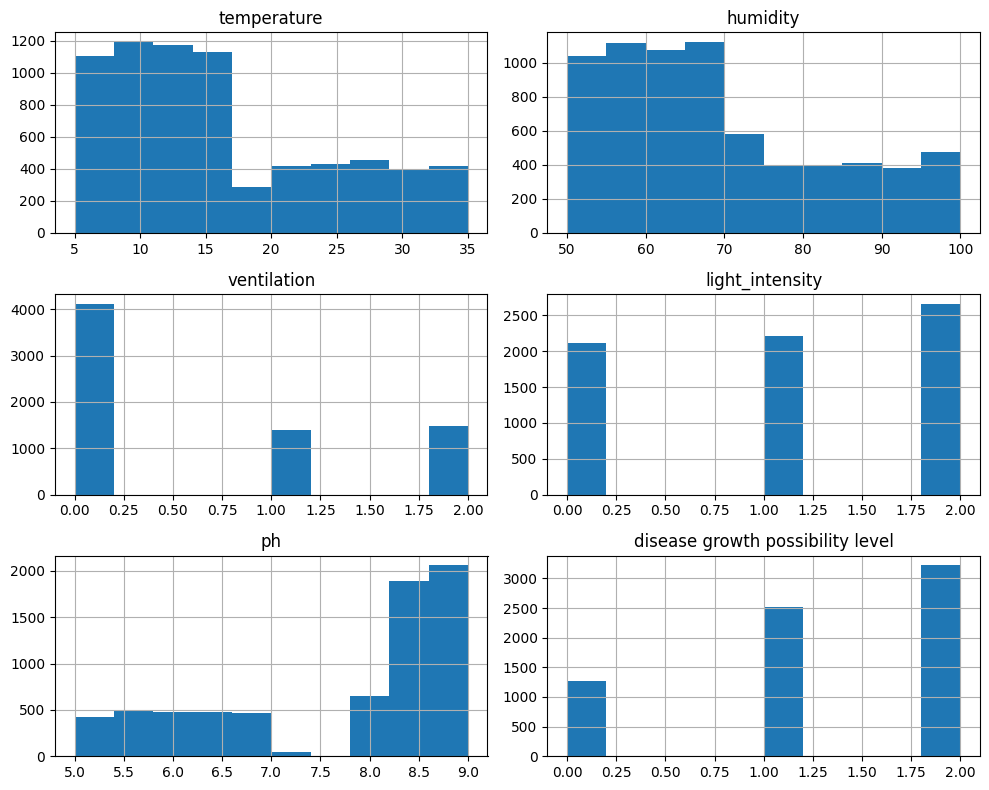

In [57]:
# Histogram of Features
fig = df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Class (Target) Distribution
Now, let's take a look at the distribution of class (target).If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

In [58]:
df['disease growth possibility level'].value_counts()#get class values

2    3222
1    2510
0    1267
Name: disease growth possibility level, dtype: int64

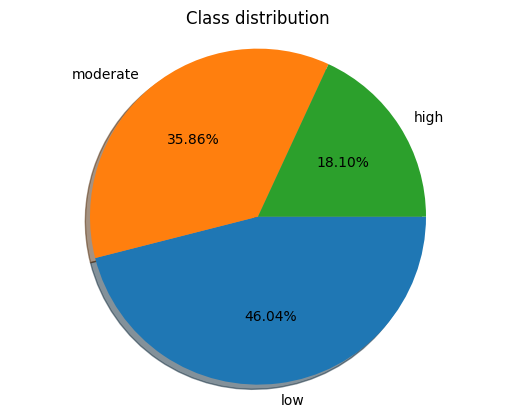

# samples associated with high level possibility for disease growth: 1267
# samples associated with moderate level possibility for disease growth: 2510
# samples associated with low level possibility for disease growth: 3222


In [59]:
class_occur = df['disease growth possibility level'].value_counts()
class_names = ['low','moderate', 'high']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with high level possibility for disease growth: {}".format(class_occur[0]))
print("# samples associated with moderate level possibility for disease growth: {}".format(class_occur[1]))
print("# samples associated with low level possibility for disease growth: {}".format(class_occur[2]))


In [60]:
# create the  object with the desired sampling strategy.
smote = SMOTE()

# fit the object to our training data
x, y = smote.fit_resample(df.loc[:,df.columns!='disease growth possibility level'], df['disease growth possibility level'])
print("Shape of X: {}".format(x.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9666, 5)
Shape of y: (9666,)


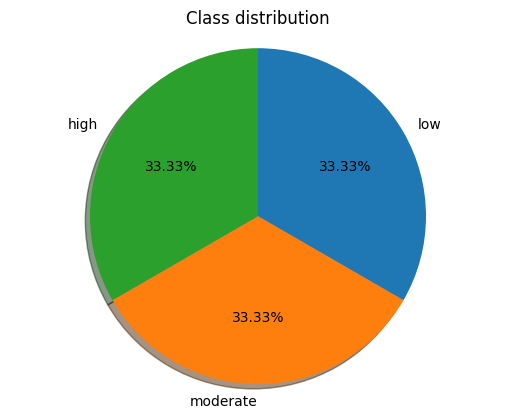

# samples associated with high level possibility for disease growth: 3222
# samples associated with moderate level possibility for disease growth: 3222
# samples associated with low level possibility for disease growth: 3222


In [61]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['low', 'moderate','high']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with high level possibility for disease growth: {}".format(class_counts[0]))
print("# samples associated with moderate level possibility for disease growth: {}".format(class_counts[1]))
print("# samples associated with low level possibility for disease growth: {}".format(class_counts[2]))

## Data splitting

In [62]:
#data splitting
x_Train, x_Test, y_Train, y_Test = train_test_split( x, y, test_size = 0.3, random_state = 42)
print("Training data : ", x_Train.shape) #print the count that is used to train
print("Testing data : ", x_Test.shape) #print the count that is used to test

Training data :  (6766, 5)
Testing data :  (2900, 5)


## Building Model

In [63]:
model = SVC(C=100, kernel='rbf',probability=True)
results = model.fit(x_Train, y_Train)
train_predictions = results.predict(x_Train)
# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_Train, train_predictions)
y_prediction = model.predict(x_Test) 
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9898019509311262


## Evaluating the Model

In [64]:
print("SVM Classification : \n", classification_report(y_Test,y_prediction))# Classification report

SVM Classification : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       989
           1       0.98      0.98      0.98       947
           2       0.99      0.99      0.99       964

    accuracy                           0.99      2900
   macro avg       0.99      0.99      0.99      2900
weighted avg       0.99      0.99      0.99      2900



In [65]:
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_Test,y_prediction)))# Confusion matrix

Confusion matrix for SVM: 
[[977  12   0]
 [ 14 927   6]
 [  0   9 955]]


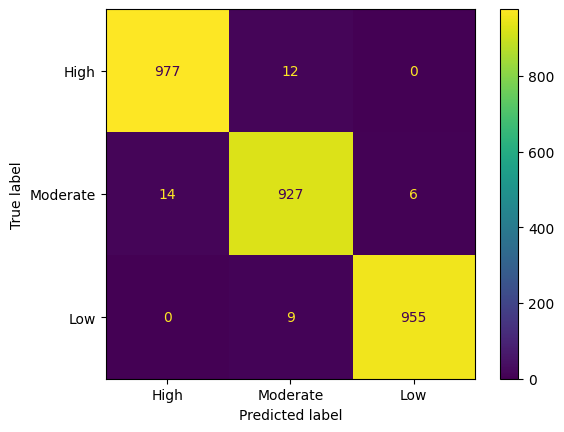

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_Test,y_prediction), display_labels=['High', 'Moderate', 'Low'])
disp.plot()

In [67]:
print("Accuracy score for SVM: {:.4f}".format(accuracy_score(y_Test,y_prediction)))# test accuracy

Accuracy score for SVM: 0.9859


In [86]:
pp=results.predict([[16.7,57,2,0,8.2],[22.8,81,1,1,5],[15.42,58,0,0,8.2],[15.6,87,0,1,9],[10.7,57,0,0,8.2]])
pp

d:\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2, 0, 2, 1, 2], dtype=int64)

## Parameter Tuning

In [69]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf']},
               {'C':[1, 10, 100], 'kernel':['poly'], } 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_Train, y_Train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'kernel': ['poly']}],
             scoring='accuracy')

In [70]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9880


Parameters that give the best results : 

 {'C': 100, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=100)


In [71]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_Test, y_Test)))

GridSearch CV score on test set: 0.9859


In [72]:
# Prepare your input data
input_params = {
    'temperature':12.6,
    'humidity': 87,
    'ventilation': 0,
    'light_intensity': 2,
    'ph': 8,

}

# Create a dataframe from the input parameters
input_df = pd.DataFrame([input_params])

# Make predictions
predictions = results.predict(input_df)

# Print the predicted label
print("Prediction:", predictions[0])

Prediction: 1


Text(0.5, 1.0, 'Actual vs Fitted Values for determining disease')

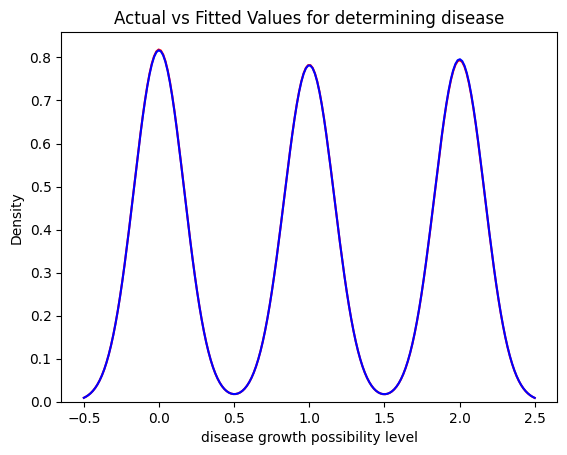

In [73]:
ax = sns.kdeplot(y_prediction, color="r", label="Actual Value")
sns.kdeplot(y_Test, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for determining disease')

Text(0.5, 1.0, 'Actual vs Fitted Values for determining disease')

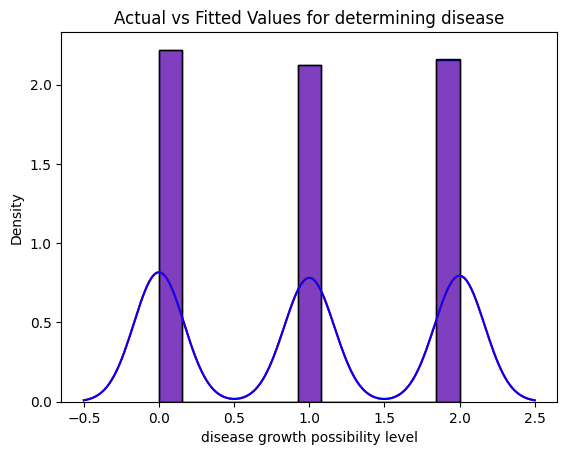

In [74]:
ax = sns.histplot(y_prediction,kde=True, stat="density",kde_kws=dict(cut=3),color="r", label="Actual Value")
sns.histplot(y_Test, kde=True, stat="density", kde_kws=dict(cut=3),color="b", label="Fitted Values", ax=ax)
plt.title('Actual vs Fitted Values for determining disease')

## Saving the model

In [87]:
#Saving the model
import pickle
 #Writing different model files to file
#path = 'D:/dis_cmp/2023-027/Disease/backend/'
#with open( path + 'modelForTestsvm-fin.pkl', 'wb') as f:
 #   pickle.dump(results,f)